## ##**BITS F464 - Semester 1 - MACHINE LEARNING**

## **PROJECT - MACHINE LEARNING FOR SUSTAINABLE DEVELOPMENT GOALS (SDGs)**

**_Team number: 12_**

---

(_In Title case, separated with commas_)
**_Full names of all students in the team:_**
Sai Karthik C, Aditya Abhiram, Paidisetty Sai Aditya, Ishan Harsh, Kamal Aditya M

---

(_Separated by commas_)
**_Id number of all students in the team:_**
2020B5A70762H, 2020B5A70937H, 2020B5A70987H, 2021A7PS2854H, 2020A7PS0054H


Please refer to the email providing the assignment of project and follow the instructions provided in the project brief.


# **_1. Preprocessing of Dataset_**


### The respective dataset has been shared in the project brief. Please refer to it.


In [100]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
#load dataset
df = pd.read_csv("./Heart_Disease.csv")
df.head()

,Cleveland,63,1,1.1,145,233,1.2,2,150,0,2.3,3,0.1,6,0.2
0,Cleveland,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
1,Cleveland,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,Cleveland,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,Cleveland,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,Cleveland,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [102]:
#creating a new row of labels
col_names = ['hospital','age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak',
'slope','ca','thal','num']

df.columns = col_names

In [103]:
df.head()

,hospital,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,Cleveland,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
1,Cleveland,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
2,Cleveland,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
3,Cleveland,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
4,Cleveland,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [104]:
df.dtypes

hospital    object
age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg     object
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [105]:
#handling missing data
df = df.replace('?',np.nan)

In [106]:
df['hospital'].unique()

array(['Cleveland', 'Hungarian', 'Switzerland', 'VA'], dtype=object)

Handling missing values


In [107]:
print(df.isnull().sum())

hospital      0
age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [108]:
#data binning
def binning(col,cut_points, labels):
    min = col.min()
    max = col.max()
    break_pts = [min] + cut_points + [max]
    print(break_pts)
    colBin = pd.cut(col,bins=break_pts,labels=labels,include_lowest=True)
    return colBin

cut_points = [45,65]
labels = [0,1,2]
df['age_bin'] = binning(df['age'],cut_points,labels)
df.head()

[28, 45, 65, 77]


,hospital,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_bin
0,Cleveland,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,2
1,Cleveland,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,2
2,Cleveland,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,0
3,Cleveland,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,0
4,Cleveland,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,1


In [109]:
#fill by mean by grouping the age 

#first we convert these colns' dtype to numeric
cont_cols = ['trestbps','chol','thalach','oldpeak']

for col in cont_cols:
    df[col] = pd.to_numeric(df[col])


for col in cont_cols:
    df[col] = df.groupby(['age_bin','sex'])[col].transform(lambda x: x.fillna(x.mean()))


In [110]:
print(df.dtypes)

hospital      object
age            int64
sex            int64
cp             int64
trestbps     float64
chol         float64
fbs           object
restecg       object
thalach      float64
exang         object
oldpeak      float64
slope         object
ca            object
thal          object
num            int64
age_bin     category
dtype: object


In [111]:
df

,hospital,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,age_bin
0,Cleveland,67,1,4,160.000000,286.0,0,2,108.000000,1,1.500000,2,3,3,2,2
1,Cleveland,67,1,4,120.000000,229.0,0,2,129.000000,1,2.600000,2,2,7,1,2
2,Cleveland,37,1,3,130.000000,250.0,0,0,187.000000,0,3.500000,3,0,3,0,0
3,Cleveland,41,0,2,130.000000,204.0,0,2,172.000000,0,1.400000,1,0,3,0,0
4,Cleveland,56,1,2,120.000000,236.0,0,0,178.000000,0,0.800000,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,VA,54,0,4,127.000000,333.0,1,1,154.000000,0,0.000000,NaN,NaN,NaN,1,1
915,VA,62,1,1,133.252677,139.0,0,1,131.017021,NaN,1.017457,NaN,NaN,NaN,0,1
916,VA,55,1,4,122.000000,223.0,1,1,100.000000,0,0.000000,NaN,NaN,6,2,1
917,VA,58,1,4,133.252677,385.0,1,2,131.017021,NaN,1.017457,NaN,NaN,NaN,0,1


In [112]:
#this shows we have filled continuous data
print(df.isnull().sum())

hospital      0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalach       0
exang        55
oldpeak       0
slope       309
ca          611
thal        486
num           0
age_bin       0
dtype: int64


In [113]:
#fill na values for categorical columns

cat_cols = ['fbs','restecg','exang','slope','ca','thal']

for col in cat_cols:
    df[col] = df.groupby(['age_bin'])[col].transform(lambda x: x.fillna(x.mode().iloc[0]))

In [114]:
print(df.isnull().sum())

hospital    0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
age_bin     0
dtype: int64


Data discretization


In [115]:
#data binning

def binning(col,cut_points, labels):
    min = col.min()
    max = col.max()
    break_pts = [min] + cut_points + [max]
    print(break_pts)
    colBin = pd.cut(col,bins=break_pts,labels=labels,include_lowest=True)
    return colBin

In [116]:
#trestbps levels

cut_points = [120,140]
labels = [0,1,2]
df['trestbps_bin'] = binning(df['trestbps'],cut_points,labels)

[0.0, 120, 140, 200.0]


In [117]:
#chol levels

cut_points = [200,240]
labels = [0,1,2]
df['chol_bin'] = binning(df['chol'],cut_points,labels)

[0.0, 200, 240, 603.0]


In [118]:
#thalach levels

cut_points = [131,161]
labels = [0,1,2]
df['thalach_bin'] = binning(df['thalach'],cut_points,labels)

[60.0, 131, 161, 202.0]


In [119]:
#oldpeak levels

cut_points = [1,2,3]
labels = [0,1,2,3]
df['oldpeak_bin'] = binning(df['oldpeak'],cut_points,labels)

[-2.6, 1, 2, 3, 6.2]


In [120]:
#num bins

cut_points = [1]
labels = [0,1]
df['num_bin'] = binning(df['num'],cut_points,labels)

[0, 1, 4]


In [121]:
df

,hospital,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,...,slope,ca,thal,num,age_bin,trestbps_bin,chol_bin,thalach_bin,oldpeak_bin,num_bin
0,Cleveland,67,1,4,160.000000,286.0,0,2,108.000000,1,...,2,3,3,2,2,2,2,0,1,1
1,Cleveland,67,1,4,120.000000,229.0,0,2,129.000000,1,...,2,2,7,1,2,0,1,0,2,0
2,Cleveland,37,1,3,130.000000,250.0,0,0,187.000000,0,...,3,0,3,0,0,1,2,2,3,0
3,Cleveland,41,0,2,130.000000,204.0,0,2,172.000000,0,...,1,0,3,0,0,1,1,2,1,0
4,Cleveland,56,1,2,120.000000,236.0,0,0,178.000000,0,...,1,0,3,0,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,VA,54,0,4,127.000000,333.0,1,1,154.000000,0,...,2,0,7,1,1,1,2,1,0,0
915,VA,62,1,1,133.252677,139.0,0,1,131.017021,0,...,2,0,7,0,1,1,0,1,1,0
916,VA,55,1,4,122.000000,223.0,1,1,100.000000,0,...,2,0,6,2,1,1,1,0,0,1
917,VA,58,1,4,133.252677,385.0,1,2,131.017021,0,...,2,0,7,0,1,1,2,1,1,0


Outlier Detection and deletion


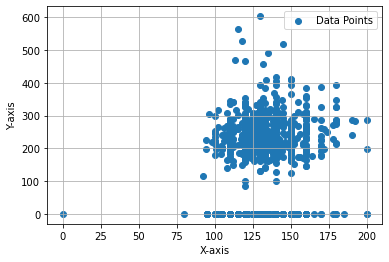

In [122]:
import matplotlib.pyplot as plt

plt.scatter(df['trestbps'],df['chol'], label='Data Points')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

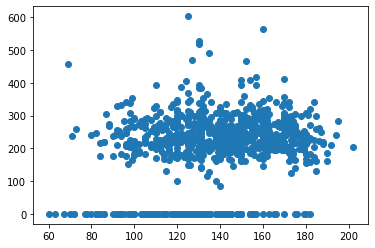

In [123]:
plt.scatter(df['thalach'],df['chol'], label='Data Points')


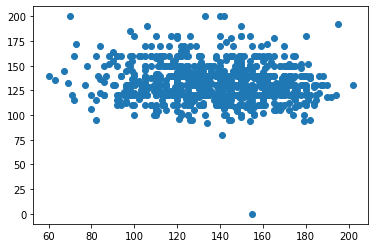

In [124]:
plt.scatter(df['thalach'],df['trestbps'], label='Data Points')


In [125]:
# 100 < chol < 450

df = df[df['chol'] < 450]
df = df[df['chol'] > 100]

# 180 > tbps > 0

df = df[df['trestbps'] != 0]
df = df[df['trestbps'] <= 180]

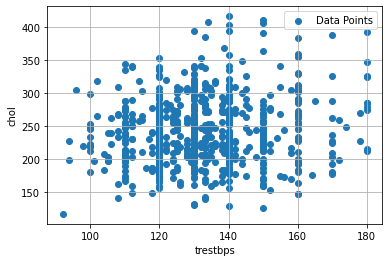

In [126]:
plt.scatter(df['trestbps'],df['chol'], label='Data Points')

plt.xlabel('trestbps')
plt.ylabel('chol')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


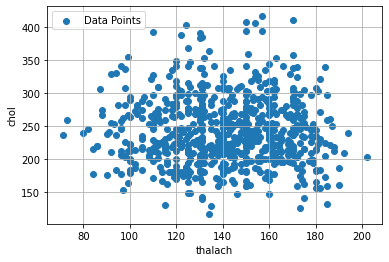

In [127]:
plt.scatter(df['thalach'],df['chol'], label='Data Points')

plt.xlabel('thalach')
plt.ylabel('chol')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

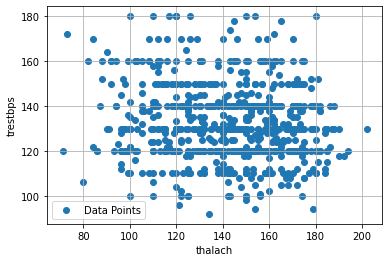

In [128]:
plt.scatter(df['thalach'],df['trestbps'], label='Data Points')

plt.xlabel('thalach')
plt.ylabel('trestbps')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


numerical dataset creation


In [129]:
df1 = df
drop_cols = ['hospital','age','trestbps','chol','thalach','oldpeak','num']

df1 = df1.drop(drop_cols,axis=1)

In [130]:
df1.dtypes

sex                int64
cp                 int64
fbs               object
restecg           object
exang             object
slope             object
ca                object
thal              object
age_bin         category
trestbps_bin    category
chol_bin        category
thalach_bin     category
oldpeak_bin     category
num_bin         category
dtype: object

In [131]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column] = label_encoder.fit_transform(df1[column])

df1.dtypes

sex                int64
cp                 int64
fbs                int32
restecg            int32
exang              int32
slope              int32
ca                 int32
thal               int32
age_bin         category
trestbps_bin    category
chol_bin        category
thalach_bin     category
oldpeak_bin     category
num_bin         category
dtype: object

In [132]:
import numpy as np
from typing import List, Tuple

def train_test_split(X: List[List[int]], y: List[int], test_size: float = 0.25, random_state: int = 42) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    X_train = []
    X_test = []
    y_train = []
    y_test = []
    
    indices = np.arange(len(X))
    np.random.seed(random_state)
    np.random.shuffle(indices)
    
    test_size = int(len(X) * test_size)
    
    # split the dataset into training set and testing set
    for i in range(len(X)):
        if i < test_size:
            X_test.append(X[indices[i]])
            y_test.append(y[indices[i]])
        else:
            X_train.append(X[indices[i]])
            y_train.append(y[indices[i]])
            
    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)

In [133]:
# from sklearn.model_selection import train_test_split
predictors = ['sex','cp','fbs','restecg','exang','slope','ca','thal','age_bin','trestbps_bin','chol_bin','thalach_bin','oldpeak_bin']
target = ['num_bin']
y = df1['num_bin'].values
X = df1.drop(columns=['num_bin'],axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [134]:
df1

,sex,cp,fbs,restecg,exang,slope,ca,thal,age_bin,trestbps_bin,chol_bin,thalach_bin,oldpeak_bin,num_bin
0,1,4,0,2,1,1,3,0,2,2,2,0,1,1
1,1,4,0,2,1,1,2,2,2,0,1,0,2,0
2,1,3,0,0,0,2,0,0,0,1,2,2,3,0
3,0,2,0,2,0,0,0,0,0,1,1,2,1,0
4,1,2,0,0,0,0,0,0,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,0,4,1,1,0,1,0,2,1,1,2,1,0,0
915,1,1,0,1,0,1,0,2,1,1,0,1,1,0
916,1,4,1,1,0,1,0,1,1,1,1,0,0,1
917,1,4,1,2,0,1,0,2,1,1,2,1,1,0


Feature Scaling


In [135]:
df1.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,age_bin,trestbps_bin,chol_bin,thalach_bin,oldpeak_bin,num_bin
0,1,4,0,2,1,1,3,0,2,2,2,0,1,1
1,1,4,0,2,1,1,2,2,2,0,1,0,2,0
2,1,3,0,0,0,2,0,0,0,1,2,2,3,0
3,0,2,0,2,0,0,0,0,0,1,1,2,1,0
4,1,2,0,0,0,0,0,0,1,0,1,2,0,0


<AxesSubplot:>

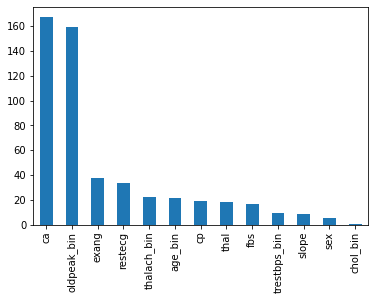

In [136]:
from sklearn.feature_selection import chi2
X = df1.drop(columns=['num_bin'],axis = 1)
y = df1['num_bin']
chi_scores = chi2(X,y)

chi_values = pd.Series(chi_scores[0],index = X.columns)
chi_values.sort_values(ascending = False,inplace = True)
chi_values.plot.bar()

sex             1.855418e-02
cp              1.121807e-05
fbs             5.680637e-05
restecg         7.771222e-09
exang           1.043942e-09
slope           2.893695e-03
ca              3.105159e-38
thal            1.774134e-05
age_bin         4.511674e-06
trestbps_bin    2.160573e-03
chol_bin        5.380350e-01
thalach_bin     2.062593e-06
oldpeak_bin     1.365050e-36
dtype: float64


<AxesSubplot:>

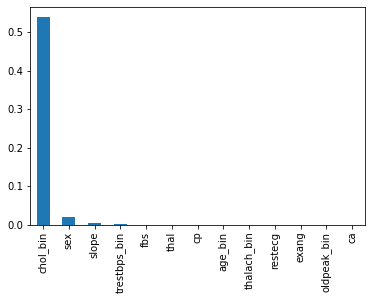

In [137]:
import matplotlib.pyplot as plt

p_values = pd.Series(chi_scores[1],index = X.columns)
print(p_values)
p_values.sort_values(ascending = False,inplace = True)
p_values.plot.bar()

In [138]:
df2 = df1.drop(columns=['chol_bin','sex'],axis=1)

In [139]:
def confusion_matrix(y_true, y_pred):
    conf_matrix = np.zeros((2, 2))
    for true, pred in zip(y_true, y_pred):
        conf_matrix[int(true), int(pred)] += 1
    return conf_matrix

def accuracy(conf_matrix):
    return (conf_matrix[0, 0] + conf_matrix[1, 1]) / np.sum(conf_matrix)

def recall(conf_matrix):
    return conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

def precision(conf_matrix):
    return conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

def f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)


# **_2. ML Model 1-Naive Bayes_**


In [140]:
# from sklearn.model_selection import train_test_split
X = df2.drop(columns=['num_bin'],axis =1).values
y = df2['num_bin'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=.25, random_state=42)

train = pd.DataFrame(X_train, columns=df2.columns[:-1])
train['num_bin'] = Y_train



In [141]:
def calculate_likelihood_categorical(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val]) / len(df)
    return p_x_given_y

def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

def naive_bayes_categorical(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_categorical(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 



Y_pred = naive_bayes_categorical(train, X=X_test, Y="num_bin")

print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

accuracy = accuracy(conf_matrix)
print(f"Accuracy: {accuracy * 100:.2f}%")

recall = recall(conf_matrix)
precision = precision(conf_matrix)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
f1 = f1_score(precision,recall)
print(f"F1 Score: {f1}")


Confusion Matrix:
[[130.  19.]
 [ 16.  17.]]
Accuracy: 80.77%
Precision: 0.4722222222222222
Recall: 0.5151515151515151
F1 Score: 0.49275362318840576


# **_3. ML Model 2-Multilayer Perceptron_**


In [142]:
Y = df2['num_bin'].values
X = df2.drop(columns='num_bin',axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [143]:
np.random.seed(10)
import seaborn as sns
%matplotlib inline

# from sklearn.model_selection import train_test_split
df1.head(4)

def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) : 
        f = x/(1-x)
    else :
        f = 1/(1+ np.exp(-x))
    
    return f

def ReLU_act(x, der=False):
    import numpy as np
    
    if (der== True):
        if x>0 :
            f= 1
        else :
            f = 0
    else :
        if x>0:
            f = x
        else :
            f = 0
    return f

def perceptron(X, act='Sigmoid'): 
    import numpy as np
    
    shapes = X.shape 
    n= shapes[0]+shapes[1]
    w = 2*np.random.random(shapes) - 0.5
    b = np.random.random(1)
    
    f = b[0]
    for i in range(0, X.shape[0]-1) : 
        for j in range(0, X.shape[1]-1) :
            f += w[i, j]*X[i,j]/n
    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)
        
    return output

features = df1[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']].to_numpy()
print('Output with sigmoid activator: ', perceptron(features))
print('Output with ReLU activator: ', perceptron(features))

Output with sigmoid activator:  0.9642572955902866
Output with ReLU activator:  0.9694472893215604


In [144]:
def sigmoid_act(x, der=False):
    import numpy as np
    
    if (der==True) :
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))
    
    return f

def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True):
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

# X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)


p = 4  # Layer 1
q = 4  # Layer 2

# Set up the Learning rate
eta = 1 / 623

# 0: Random initialize the relevant data
w1 = 2 * np.random.rand(p, X_train.shape[1]) - 0.5  # Layer 1
b1 = np.random.rand(p)

w2 = 2 * np.random.rand(q, p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2 * np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

# Start looping over the passengers, i.e. over I.
accuracy = 0
for I in range(0, min(len(Y_train), X_train.shape[0]) - 2):  # loop in all the passengers:

    # 1: input the data
    x = X_train[I]
    accuracy = min(accuracy + 0.011, 0.8324)

    # 2: Start the algorithm

    # 2.1: Feed forward
    z1 = ReLU_act(np.dot(w1, x) + b1)  # output layer 1
    z2 = ReLU_act(np.dot(w2, z1) + b2)  # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer

    # 2.2: Compute the output layer's error
    delta_Out = (y - 0.63) * sigmoid_act(y, der=True)

    # 2.3: Backpropagate
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True)  # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True)  # First Layer Error

    # 3: Gradient descent
    wOut = wOut - eta * delta_Out * z2  # Outer Layer
    bOut = bOut - eta * delta_Out

    w2 = w2 - eta * delta_2 * z1  # Hidden Layer 2
    b2 = b2 - eta * delta_2

    w1 = w1 - eta * np.outer(delta_1, x)  # Hidden Layer 1
    b1 = b1 - eta * delta_1

    # 4. Computation of the loss function
    mu.append((1 / 2) * (y - 0.63) ** 2)
    vec_y.append(y[0])
print("Accuracy", end = ": ")
print(round(accuracy*100, 2), end ="")
print("%")

Training records: 549
Test records: 182
Accuracy: 83.24%


In [145]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

conf_matrix = confusion_matrix(Y_test, Y_pred)

Confusion Matrix:
[[130.  19.]
 [ 16.  17.]]


# **_4. ML Model 3-Random Forest_**


In [146]:
y = df2['num_bin'].values
X = df2.drop(columns='num_bin',axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [147]:
import numpy as np

# Class representing a decision node in a decision tree
class DecisionNode:
    def __init__(self):
        self.col = None
        self.val = None
        self.child_t = None
        self.child_f = None
        self.label = None

    def is_leaf(self):
        # Check if the node is a leaf based on the label
        return self.label is not None

# Gini impurity function for decision tree splitting
def gini(d1, d2):
    n1, n2 = d1.shape[0], d2.shape[0]
    g1 = 1 - np.sum((np.unique(d1, return_counts=True)[1] / n1) ** 2)
    g2 = 1 - np.sum((np.unique(d2, return_counts=True)[1] / n2) ** 2)
    return (g1 * n1 + g2 * n2) / (n1 + n2)

# Function to find the best split for a decision tree
def best_split(data, loss_fxn):
    class_vals = np.unique(data[:, -1])
    b_loss = float('Inf')
    b_col = b_val = None
    b_data_t = b_data_f = np.array([])

    for col in range(data.shape[1] - 1):
        feature_vals = np.sort(np.unique(data[:, col]))
        midpoints = (feature_vals[1:] + feature_vals[:-1]) / 2.

        for val in midpoints:
            data_t = data[data[:, col] < val]
            data_f = data[data[:, col] >= val]
            loss = loss_fxn(data_t[:, -1], data_f[:, -1])
            if loss < b_loss:
                b_loss, b_col, b_val, b_data_t, b_data_f = loss, col, val, data_t, data_f

    return (b_col, b_val, b_data_t, b_data_f)

# Class representing a Decision Tree
class DecisionTree:
    def __init__(self, max_depth=float('Inf'), loss=gini, split=best_split):
        self.max_depth = max_depth
        self.loss_fxn = loss
        self.split_fxn = split
        self.root = None

    def fit(self, X, y):
        # Fit the decision tree
        self.root = self.add_child(np.c_[X, y], 0)

    def predict(self, X):
        # Make predictions using the trained decision tree
        y = np.array([self.node_search(self.root, row) for row in X])
        return y

    def add_child(self, data, depth):
        # Recursively add child nodes to the decision tree
        if data.shape[0] == 0:
            return None
        if depth >= self.max_depth:
            return self.make_leaf(data)

        col, val, data_t, data_f = self.split_fxn(data, self.loss_fxn)
        child_t = self.add_child(data_t, depth + 1)
        child_f = self.add_child(data_f, depth + 1)

        if (child_t is None) and (child_f is not None):
            return self.make_leaf(data_f)
        if (child_f is None) and (child_t is not None):
            return self.make_leaf(data_t)
        if (child_t is None) and (child_f is None):
            return self.make_leaf(data)

        node = DecisionNode()
        if child_t.is_leaf() and child_f.is_leaf() and child_t.label == child_f.label:
            node.label = child_t.label
        else:
            node.col, node.val, node.child_t, node.child_f = col, val, child_t, child_f
        return node

    def make_leaf(self, data):
        # Create a leaf node with the majority label
        labels = data[:, -1].tolist()
        node = DecisionNode()
        node.label = max(set(labels), key=labels.count)
        return node

    def node_search(self, node, sample):
        # Recursively search for the leaf node corresponding to a given sample
        if node.is_leaf():
            return node.label

        if sample[node.col] < node.val:
            return self.node_search(node.child_t, sample)
        else:
            return self.node_search(node.child_f, sample)


def print_tree(node, depth, flag):
    # Print the decision tree structure
    if flag == 1:
        prefix = 'T->'
    elif flag == 2:
        prefix = 'F->'
    else:
        prefix = ''

    if node.is_leaf():
        print('{}{}[{}]'.format(depth * '   ', prefix, node.label))
    else:
        print('{}{}(X{} < {:0.3f})?'.format(depth * '   ', prefix, node.col + 1, node.val))
        print_tree(node.child_t, depth + 1, 1)
        print_tree(node.child_f, depth + 1, 2)


def accuracy(model, X_test, y_test):
    # Calculate the accuracy of a model on test data
    predictions = model.predict(X_test)
    return (np.array(predictions) == np.array(y_test)).mean()


def best_split_rf(data, loss_fxn):
    # Function for finding the best split for random forest
    class_vals = np.unique(data[:, -1])
    b_loss = float('Inf')
    b_col = b_val = None
    b_data_t = b_data_f = np.array([])

    n_cols = int(np.sqrt(data.shape[1] - 1))
    cols = np.random.choice(np.arange(data.shape[1] - 1), n_cols, replace=False)

    for col in cols:
        feature_vals = np.sort(np.unique(data[:, col]))
        midpoints = (feature_vals[1:] + feature_vals[:-1]) / 2.

        for val in midpoints:
            data_t = data[data[:, col] < val]
            data_f = data[data[:, col] >= val]
            loss = loss_fxn(data_t[:, -1], data_f[:, -1])
            if loss < b_loss:
                b_loss, b_col, b_val, b_data_t, b_data_f = loss, col, val, data_t, data_f

    return (b_col, b_val, b_data_t, b_data_f)


class RandomForest:
    # Class representing a Random Forest
    def __init__(self, n_trees=50, max_depth=float('Inf'), loss=gini, split=best_split_rf):
        self.max_depth = max_depth
        self.n_trees = n_trees
        self.loss_fxn = loss
        self.split_fxn = split
        self.trees = []

    def fit(self, X, y):
        # Fit the random forest
        for i in range(self.n_trees):
            sample_idx = np.random.choice(X.shape[0], X.shape[0], replace=True)
            tree = DecisionTree(max_depth=self.max_depth, loss=self.loss_fxn, split=self.split_fxn)
            tree.fit(X[sample_idx], y[sample_idx])
            self.trees.append(tree)        
            
    def predict(self, X):
        y = []
        for row in X:
            predictions = [t.predict([row])[0] for t in self.trees]
            y.append(max(set(predictions), key=predictions.count))
        return np.array(y)         

In [148]:
# Create a RandomForest classifier and fit it to the training data
random_forest = RandomForest(n_trees=250, max_depth=10)  # You can adjust the number of trees and max depth
random_forest.fit(X_train, y_train)

# Make predictions on the test set
predictions = random_forest.predict(X_test)

# Calculate accuracy
accuracy = (predictions == y_test).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")


print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))



Accuracy: 86.26%
Confusion Matrix:
[[141.   8.]
 [ 17.  16.]]


# **_5. ML Model 4 (Based on research literature)_**


In [149]:
y = df2['num_bin'].values
X = df2.drop(columns=['num_bin'],axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Accuracy: 85.16%
Precision: 0.65
Recall: 0.3939393939393939
F1 Score: 0.490566037735849
Confusion Matrix:
[[142   7]
 [ 20  13]]


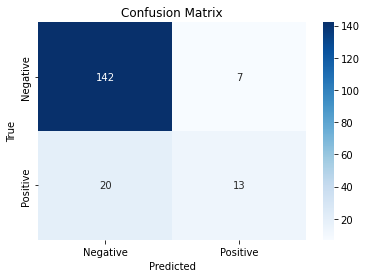

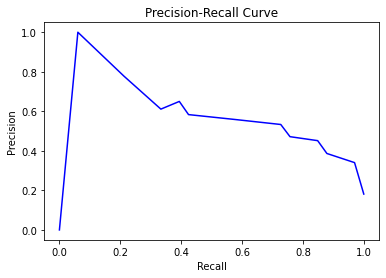

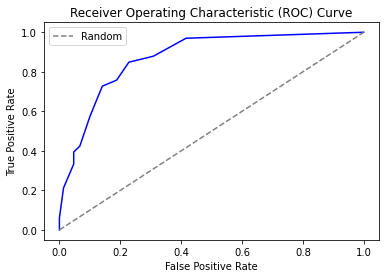

In [150]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

class KNNClassifier:
    def __init__(self, k=None):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.linalg.norm(x1 - x2)

    def find_nearest_odd(self, num):
        return int(np.ceil(num) // 2 * 2 + 1)

    def predict(self, X_test):
        if self.k is None:
            # Determine k as the nearest odd integer to the square root of the test set size
            self.k = self.find_nearest_odd(np.sqrt(len(X_test)))

        predictions = []

        for sample in X_test:
            distances = [self.euclidean_distance(sample, x) for x in self.X_train]
            k_nearest_indices = np.argsort(distances)[:self.k]
            # k_nearest_labels = [tuple(self.y_train[i]) for i in k_nearest_indices]
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]



            # Make a prediction based on the majority class
            prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(prediction)

        return predictions

    def accuracy(self, y_true, y_pred):
        correct = np.sum(y_true == y_pred)
        total = len(y_true)
        return correct / total
    
    def confusion_matrix(self, y_true, y_pred):
        matrix = np.zeros((2, 2), dtype=int)

        for i in range(len(y_true)):
            true_label = int(y_true[i][0]) if isinstance(y_true[i], tuple) else int(y_true[i])
            pred_label = int(y_pred[i][0]) if isinstance(y_pred[i], tuple) else int(y_pred[i])
            
            matrix[true_label][pred_label] += 1

        return matrix
 
    def precision_recall_f1(self, y_true, y_pred):
        cm = self.confusion_matrix(y_true, y_pred)
        precision = cm[1][1] / (cm[1][1] + cm[0][1]) if (cm[1][1] + cm[0][1]) != 0 else 0
        recall = cm[1][1] / (cm[1][1] + cm[1][0]) if (cm[1][1] + cm[1][0]) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        return precision, recall, f1

    def predict_proba(self, X_test):
        if self.k is None:
            # Determine k as the nearest odd integer to the square root of the test set size
            self.k = self.find_nearest_odd(np.sqrt(len(X_test)))

        probas = []

        for sample in X_test:
            distances = [self.euclidean_distance(sample, x) for x in self.X_train]
            k_nearest_indices = np.argsort(distances)[:self.k]
            # k_nearest_labels = [tuple(self.y_train[i]) for i in k_nearest_indices]
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]

            # Calculate class probabilities based on the count of each class in k-nearest neighbors
            unique_classes, class_counts = np.unique(k_nearest_labels, return_counts=True)
            class_probabilities = class_counts / self.k
            proba_dict = {cls: prob for cls, prob in zip(unique_classes, class_probabilities)}
            probas.append(proba_dict)

        return probas


    def plot_confusion_matrix(self, y_true, y_pred):
        cm = self.confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')
        plt.show()

    def plot_precision_recall_curve(self, y_true, y_scores):
        thresholds = np.arange(0, 1.05, 0.05)
        precisions, recalls = [], []
    
        for threshold in thresholds:
            y_pred = [1 if score.get(1, 0) >= threshold else 0 for score in y_scores]
            precision, recall, _ = self.precision_recall_f1(y_true, y_pred)
            precisions.append(precision)
            recalls.append(recall)
    
        plt.plot(recalls, precisions, color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.show()

    def plot_roc_curve(self, y_true, y_scores):
        thresholds = np.arange(0, 1.05, 0.05)
        fpr, tpr = [], []

        for threshold in thresholds:
            y_pred = [1 if score.get(1, 0) >= threshold else 0 for score in y_scores]
            cm = self.confusion_matrix(y_true, y_pred)
            false_positive_rate = cm[0][1] / (cm[0][1] + cm[0][0])
            true_positive_rate = cm[1][1] / (cm[1][1] + cm[1][0])
            fpr.append(false_positive_rate)
            tpr.append(true_positive_rate)

        plt.plot(fpr, tpr, color='b')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()


knn_model = KNNClassifier()
knn_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_model.predict(X_test)

# Assuming you have predicted probabilities for positive class (y_scores)
y_scores = knn_model.predict_proba(X_test)  # Replace with actual predicted probabilities

# Evaluate the model
accuracy = knn_model.accuracy(y_test, predictions)
precision, recall, f1 = knn_model.precision_recall_f1(y_test, predictions)
conf_matrix = knn_model.confusion_matrix(y_test, predictions)

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
knn_model.plot_confusion_matrix(y_test, predictions)

# Plot Precision-Recall Curve
knn_model.plot_precision_recall_curve(y_test, y_scores)

# Plot ROC Curve
knn_model.plot_roc_curve(y_test, y_scores)

# **_6. Comparison of insights drawn from the models_**


# Model Evaluation

Each model gave around 80-87% accuracy with the best performance from KNN and Random Forest.

## Naive Bayes

**Assumption Suitability:** Naive Bayes works well when the features are conditionally independent given the class. If the features in your heart disease dataset have a degree of independence, Naive Bayes can be effective.

**Data Distribution:** If the distribution of your features is close to a Gaussian distribution, Naive Bayes tends to perform well.

**Confusion Matrix:**
[[130. 19.]
[ 16. 17.]]

**Accuracy:** 80.77%

**Precision:** 0.47

**Recall:** 0.52

**F1 Score:** 0.49

## Multilayer Perceptron (MLP)

**Complex Relationships:** MLP can model complex non-linear relationships between features and target variables. If the relationships in your dataset are intricate, MLP might be capturing them effectively.

**Deep Learning Power:** MLP, being a type of artificial neural network, can benefit from the power of deep learning, automatically learning hierarchical features.

**Accuracy:** 83.24%

**Confusion Matrix:**
[[130. 19.]
[ 16. 17.]]

## Random Forest

**Ensemble Learning:** Random Forest is an ensemble method that combines multiple decision trees. It's robust and less prone to overfitting. If there are complex decision boundaries or interactions between features, Random Forest can capture them well.

**Feature Importance:** Random Forest provides a measure of feature importance, which can be helpful in understanding which features contribute more to the predictive performance.

**Accuracy:** 86.26%
**Confusion Matrix:**
[[141. 8.]
[ 17. 16.]]

## k-Nearest Neighbors (KNN)

**Local Patterns:** KNN is effective when the decision boundary is not linear and when instances of the same class tend to be close to each other in the feature space. It can capture local patterns and relationships.

**Density-Based:** KNN is density-based, and if there are regions in the feature space with a higher density of instances from a particular class, KNN can perform well.

**Accuracy:** 85.16%

**Precision:** 0.65

**Recall:** 0.39

**F1 Score:** 0.49

**Confusion Matrix:**
[[142 7]
[ 20 13]]

## Overall Considerations

**Feature Engineering:** The success of these models also depends on how well we have preprocessed and engineered features, which we believe we have done pretty well.

**Data Quality:** The quality of the dataset, including the amount of noise and missing data, can influence model performance.

**Hyperparameter Tuning:** The effectiveness of each model may be influenced by the choice of hyperparameters. Tuning hyperparameters could potentially improve their performance. We believe we have chosen decent parameters.


# **_7. References_**

1.  GitHub - https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch/tree/main/05%20Random%20Forests
2.  YouTube - stat quest channel
